In [1]:
#Import Python Libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import csv file
df=pd.read_csv(r"C:\Users\sumeet tompe\Desktop\Data Analyst\Python Project\Expanded_data_with_more_features.csv",encoding='unicode_escape')

In [3]:
#show the top 10 rows
df.head(10)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39
8,8,male,group D,high school,free/reduced,completed,single,sometimes,no,3.0,private,> 10,65,64,68
9,9,female,group B,high school,free/reduced,none,married,regularly,yes,NaN,private,< 5,37,59,50


In [4]:
#Describe() method return description of the data in the Dataframe(i.e.Count,mean,std,etc)
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [5]:
#It give the details information about the table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [6]:
#check for null values
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [7]:
#drop Unrelated / blank/unnamed columns
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [9]:
#Change weekly study hours column
df["WklyStudyHours"] = df["WklyStudyHours"].str.replace("05-Oct","05-10")
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


# Exploratory Data Analysis

# Gender Distribution

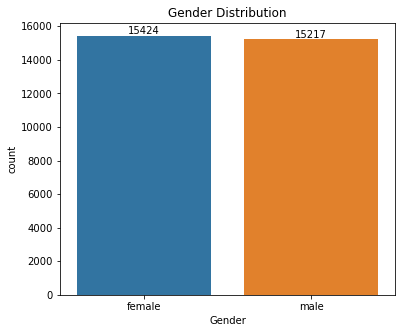

In [23]:
plt.figure(figsize=(6,5))
ax=sns.countplot(data=df,x = "Gender")
for bars in ax.containers:
    ax.bar_label(bars)
    plt.title("Gender Distribution")
plt.show()

In [ ]:
#from the above chart i have analysed that:
#the number of females in the data is more thanthe number of males

In [17]:
#groupby on the basis of parents education "Mathscore","Reading score","WritingScore":Mean

gb=df.groupby("ParentEduc").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


# RelationShip Btw Parent's Education & Student's Score

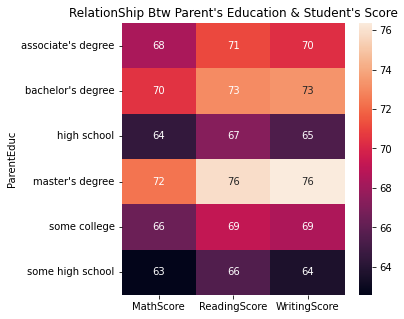

In [24]:
#Showing heat map for Relationship btw parents Education & Student's Score
plt.figure(figsize=(5,5))
sns.heatmap(gb,annot=True)
plt.title("RelationShip Btw Parent's Education & Student's Score")
plt.show()

In [ ]:
# From the above chart we have calculated that the education of the parents have good impact on there Score

In [21]:
#groupby on the basis of parents Marital Status 
gb1=df.groupby("ParentMaritalStatus").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


# RelationShip Btw Parent's MaritalStatus & Student's Score

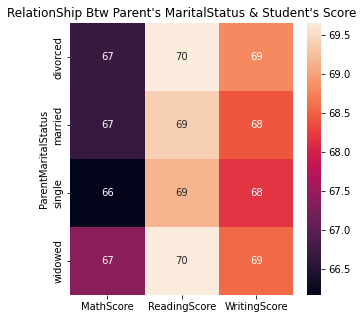

In [25]:
plt.figure(figsize=(5,5))
sns.heatmap(gb1,annot=True)
plt.title("RelationShip Btw Parent's MaritalStatus & Student's Score")
plt.show()

In [ ]:
#From the above chart we have concluded that there is no /negligible impact on the 
#student score due to their parent's marital status

# Box Plot

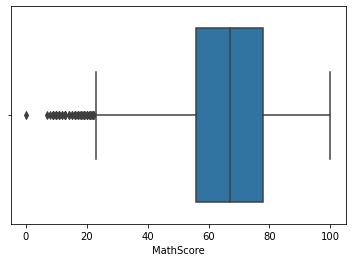

In [26]:
# Using Box plot, it show the outliers are there or not (Range)
sns.boxplot(data=df, x="MathScore")
plt.show()

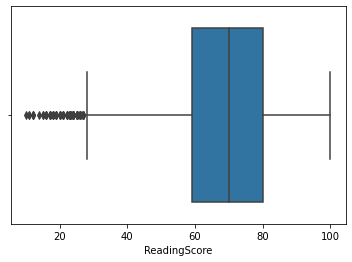

In [27]:
sns.boxplot(data=df, x="ReadingScore")
plt.show()

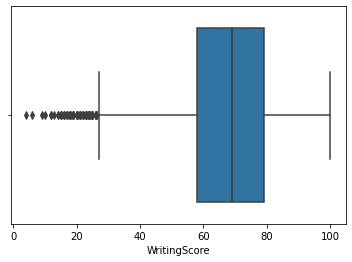

In [28]:
sns.boxplot(data=df, x="WritingScore")
plt.show()

In [30]:
#Finding Unique values in Ethnic Group
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


# Distribution of Ethnic-Groups

[2219, 5826, 9212, 7503, 4041]


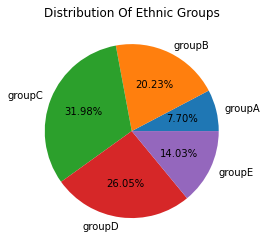

In [41]:
groupA = df.loc[(df['EthnicGroup']=="group A")].count()
groupB = df.loc[(df['EthnicGroup']=="group B")].count()
groupC = df.loc[(df['EthnicGroup']=="group C")].count()
groupD = df.loc[(df['EthnicGroup']=="group D")].count()
groupE = df.loc[(df['EthnicGroup']=="group E")].count()

l=["groupA","groupB","groupC","groupD","groupE"]
mlist=[groupA["EthnicGroup"],groupB["EthnicGroup"],groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"]]


print(mlist)


plt.pie(mlist,labels=l,autopct="%1.2f%%")
plt.title("Distribution Of Ethnic Groups")
plt.show()

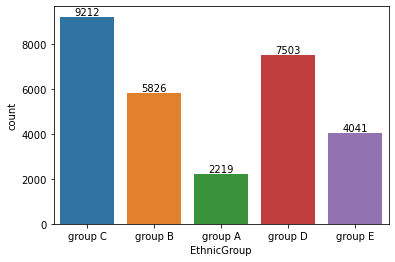

In [40]:
# To check the values of Ethnic Group using bar graph
ax=sns.countplot(data=df,x='EthnicGroup')
for bars in ax.containers:
    ax.bar_label(bars)


# Conclusion 

In [ ]:
# from this we concluded that Student score does't effected based on
#marital status and but based education it can ,the highest values of ethnic group is group C.